## CAPSTONE PROJECT:- PRCP-1025-FlightPricePrediction

## 1.Busines Case:- To predict the flight ticket prices based on given  data

Flight ticket prices can be something hard to guess, today we might see a price, check
out the price of the same flight tomorrow, it will be a different story. We might have often
heard travelers saying that flight ticket prices are so unpredictable. That’s why we will
try to use machine learning to solve this problem. This can help airlines by predicting
what prices they can maintain.

* Task 1:-Prepare a complete data analysis report on the given data.
* Task 2:-Create a predictive model which will help the customers to predict future flight
prices and plan their journey accordingly.

# 2.Import Libraries:

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import datetime as dt
from datetime import datetime
from datetime import datetime, timedelta
import time
import re
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()

# 3. Load Dataset: 

In [3]:
data = pd.read_csv("Flight_Fare_CSV.csv")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# 4. Domain Analysis:


1. **Airline**: This column contains the name of the airline company operating the flight.

2. **Date of Journey**: This column holds the date on which the flight departs or commences its journey.

3. **Source**: This column indicates the city from which the flight originates.

4. **Destination**: This column indicates the city where the flight is expected to land.

5. **Route**: This column describes the path or stops the flight will take to reach its final destination.

6. **Departure Time**: This is the scheduled time when the flight is set to take off.

7. **Arrival Time**: This is the scheduled time when the flight is set to land at its destination.

8. **Duration**: This column shows the total travel time in hours from departure to arrival.

9. **Total Stops**: This column indicates the number of stops or layovers between the source and destination.

10. **Additional_Info**: This column contains any other relevant information about the flight, like special services, amenities, or specific instructions.

11. **Price**: This column is the target variable, containing the ticket price information.

# 5.  Basic Checks:

In [4]:
# Check Shape
data.shape

(10683, 11)

In [5]:
# Check Datatypes
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
# Check columns:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
# Check Head:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
# Check Tail:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [9]:
# Check Info:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
# Check Describe:
data.describe(include=("O"))

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


# 6. EDA:
## 6.1. Univariate:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

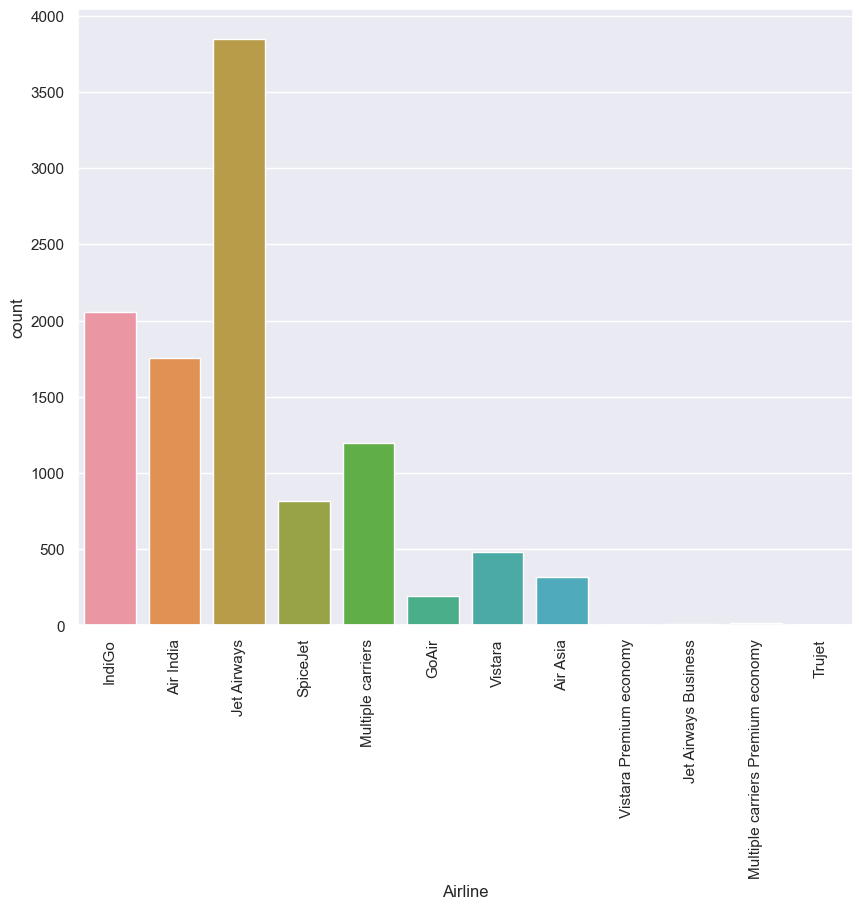

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x=data.Airline)
plt.xticks(rotation = 90)

#### Insights:

* Among all other Airline Companies Jet Airways Airline is the highest

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

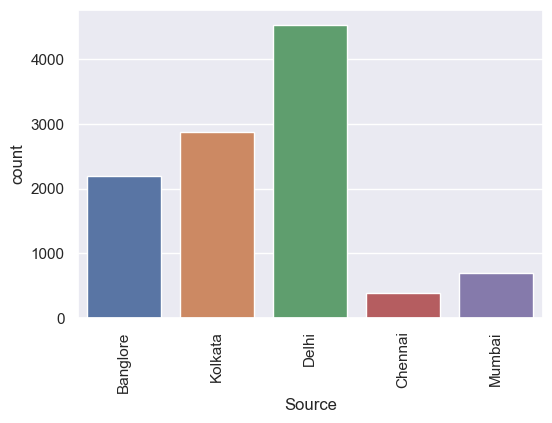

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x=data.Source)
plt.xticks(rotation = 90)

#### Insights:

* Delhi is the city where highest number of flight takeoffs occurs, Kolkata and Bangalore are 2nd and 3rd

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

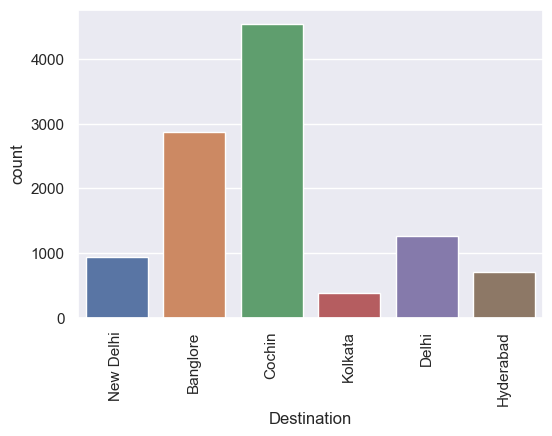

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x=data.Destination)
plt.xticks(rotation = 90)

#### Insights:

* Highest Number of flights land in the destination Cochin, Bangalore is 2nd Highest

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

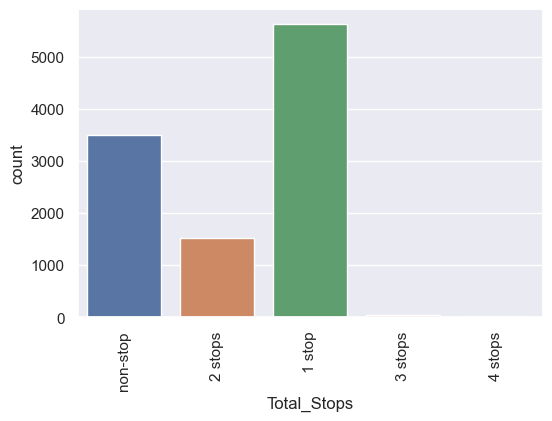

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x=data.Total_Stops)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

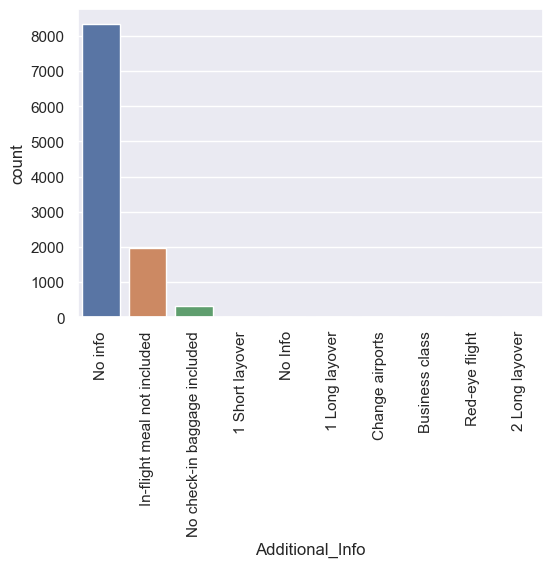

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x=data.Additional_Info)
plt.xticks(rotation = 90)

#### Insights:

* More number of flights has 1 stop, than 2 stop and non stop

In [17]:
! pip install sweetviz

In [18]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Insights:

- Most ticket prices fall within the 20,000 range, though a few are significantly higher.
  
- Jet Airways operates the most flights, but Jet Airways Business has a much higher average ticket price compared to other airlines.

- Delhi is the city with the most departures, and it also has the highest average ticket price.

- Cochin is the most common final destination, but flights to New Delhi tend to be the most expensive on average.

- Just over half of the flights have a single stop between departure and arrival, while roughly one-third are non-stop.

## 6.2. Bivariate:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

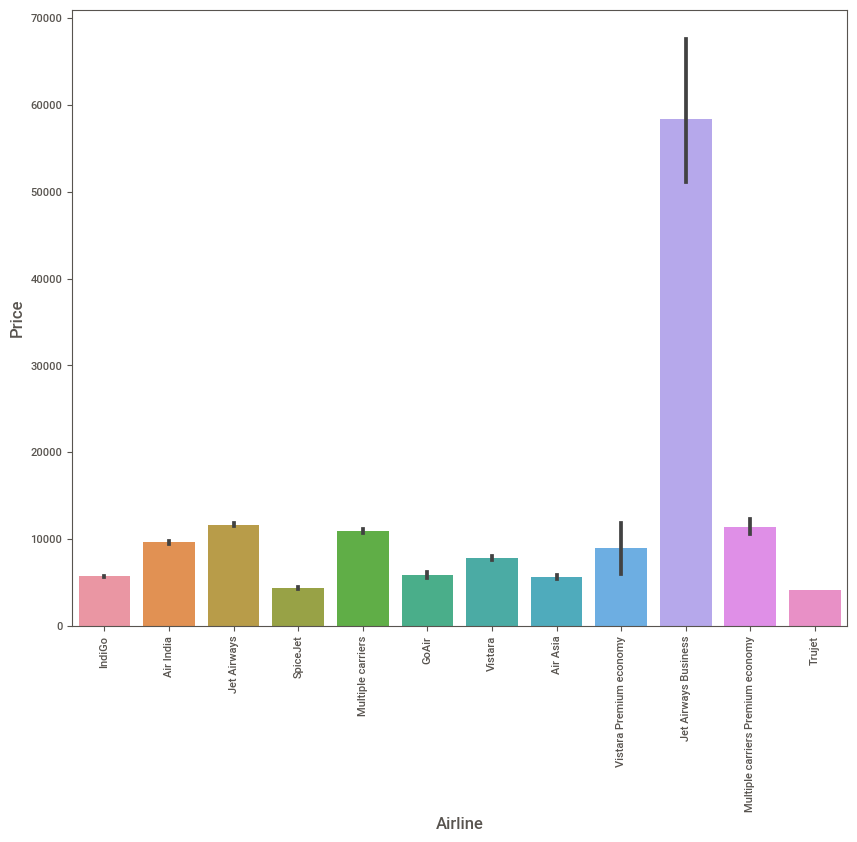

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x="Airline", y="Price",data=data)
plt.xticks(rotation = 90)

#### Insights:

*Jet Airways Business class tickets has the highest prices than Other Airlines

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

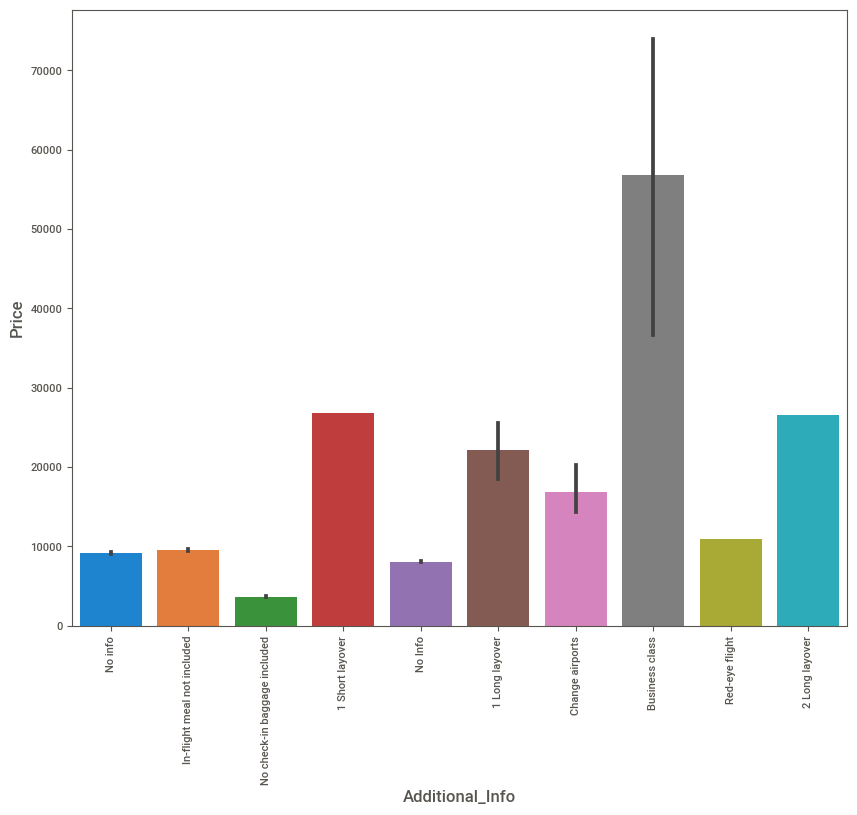

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(x="Additional_Info", y="Price",data=data)
plt.xticks(rotation = 90)

#### Insights:

* Business Class tickets has high ticket price in Airline Industry

# 7. Data Preprocessing:

## 7.1. Null values:

In [21]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Insights:

* We drop the two Null values:
* 1 in Route Column
* 1 in Total_Stops Column

In [22]:
# remove null Values:
data.dropna(inplace=True)

In [23]:
# Check for null values.
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [24]:
data.duplicated().sum()

220

In [25]:
data.drop_duplicates()
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### 7.2. Conversion of  Categorical variables:

In [26]:
cat_col = data.select_dtypes(include="O")
cat_col.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR ? BOM ? DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info


###  1. Airline:

In [27]:
# check for unique value in Airline column:
data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [28]:
#check for value_counts in Airline column:
data.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [29]:
# Encode Airline column using one hot encoding:
df1 = pd.get_dummies(data["Airline"],drop_first=True)
data = pd.concat((data,df1),axis=1).drop("Airline",axis=1)

### 2. Source:

In [30]:
# check for unique values in Airline column:
data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [31]:
# check for value_counts in Source column:
data.Source.value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [32]:
# Encode Source column by mannual encoding:
data.Source=data.Source.map({'Delhi':4,'Kolkata':3,"Banglore":2,"Mumbai":1,"Chennai":0})
data.head()

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,24/03/2019,2,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,...,False,True,False,False,False,False,False,False,False,False
1,1/05/2019,3,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,...,False,False,False,False,False,False,False,False,False,False
2,9/06/2019,4,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,...,False,False,True,False,False,False,False,False,False,False
3,12/05/2019,3,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,...,False,True,False,False,False,False,False,False,False,False
4,01/03/2019,2,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,...,False,True,False,False,False,False,False,False,False,False


### 3. Destination:

In [33]:
# check for unique values in Destination column:
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [34]:
# check for value_counts in Destination column:
data.Destination.value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [35]:
# Encode Destination column using mannual encoding:
data.Destination=data.Destination.map({"Cochin":5,"Banglore":4,"Delhi":3,"New Delhi":2,"Hyderabad":1,"Kolkata":0})
data.head()

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,24/03/2019,2,2,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,...,False,True,False,False,False,False,False,False,False,False
1,1/05/2019,3,4,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,...,False,False,False,False,False,False,False,False,False,False
2,9/06/2019,4,5,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,...,False,False,True,False,False,False,False,False,False,False
3,12/05/2019,3,4,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,...,False,True,False,False,False,False,False,False,False,False
4,01/03/2019,2,2,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,...,False,True,False,False,False,False,False,False,False,False


### 4. Total_Stops:

In [36]:
# check for unique values in Total_Stops column:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [37]:
# check for value_counts in Total_Stops column:
data.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [38]:
# Encode Total_Stops column using mannual encoding:
data.Total_Stops=data.Total_Stops.map({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})
data.head()

,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,24/03/2019,2,2,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,...,False,True,False,False,False,False,False,False,False,False
1,1/05/2019,3,4,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2,No info,7662,...,False,False,False,False,False,False,False,False,False,False
2,9/06/2019,4,5,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2,No info,13882,...,False,False,True,False,False,False,False,False,False,False
3,12/05/2019,3,4,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1,No info,6218,...,False,True,False,False,False,False,False,False,False,False
4,01/03/2019,2,2,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1,No info,13302,...,False,True,False,False,False,False,False,False,False,False


In [39]:
data.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [40]:
data.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,24/03/2019,2,2,22:20,01:10 22 Mar,2h 50m,0,3897,False,False,True,False,False,False,False,False,False,False,False
1,1/05/2019,3,4,05:50,13:15,7h 25m,2,7662,True,False,False,False,False,False,False,False,False,False,False
2,9/06/2019,4,5,09:25,04:25 10 Jun,19h,2,13882,False,False,False,True,False,False,False,False,False,False,False
3,12/05/2019,3,4,18:05,23:30,5h 25m,1,6218,False,False,True,False,False,False,False,False,False,False,False
4,01/03/2019,2,2,16:50,21:35,4h 45m,1,13302,False,False,True,False,False,False,False,False,False,False,False


#### Insights:

* As we know Route and Total stops both the columns are similar, we drop Route column.
* As 80% of the column does not have info in Additional_info column, we drop it

### 5. Dep_Time:

#### Converting into Datetime:

- To accomplish this, we need `pandas.to_datetime` to transform a column with an object data type into a DateTime format.
- The `dt.day` function retrieves the day from a given date.
- The `dt.month` function extracts the month from a given date.

In [41]:
data["Dep_Time"]=pd.to_datetime(data["Dep_Time"])

In [42]:
# Hour:
data["Dep_hrs"]=data["Dep_Time"].dt.hour


# Minute:
data["Dep_min"]=data["Dep_Time"].dt.minute

In [43]:
data.drop("Dep_Time",axis=1,inplace=True)
data.head()

,Date_of_Journey,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Dep_hrs,Dep_min
0,24/03/2019,2,2,01:10 22 Mar,2h 50m,0,3897,False,False,True,False,False,False,False,False,False,False,False,22,20
1,1/05/2019,3,4,13:15,7h 25m,2,7662,True,False,False,False,False,False,False,False,False,False,False,5,50
2,9/06/2019,4,5,04:25 10 Jun,19h,2,13882,False,False,False,True,False,False,False,False,False,False,False,9,25
3,12/05/2019,3,4,23:30,5h 25m,1,6218,False,False,True,False,False,False,False,False,False,False,False,18,5
4,01/03/2019,2,2,21:35,4h 45m,1,13302,False,False,True,False,False,False,False,False,False,False,False,16,50


### 6. Date_of_Journey:

In [44]:
data["Date_of_Journey"]= pd.to_datetime(data["Date_of_Journey"])

In [45]:
# Year:
data["Date_of_journey_year"]=data["Date_of_Journey"].dt.year

# Month:
data["Date_of_journey_month"]=data["Date_of_Journey"].dt.month

# Day:
data["Date_of_journey_day"]=data["Date_of_Journey"].dt.day

In [46]:
data.drop("Date_of_Journey",axis=1,inplace=True)
data.head()

,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,...,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Dep_hrs,Dep_min,Date_of_journey_year,Date_of_journey_month,Date_of_journey_day
0,2,2,01:10 22 Mar,2h 50m,0,3897,False,False,True,False,...,False,False,False,False,False,22,20,2019,3,24
1,3,4,13:15,7h 25m,2,7662,True,False,False,False,...,False,False,False,False,False,5,50,2019,5,1
2,4,5,04:25 10 Jun,19h,2,13882,False,False,False,True,...,False,False,False,False,False,9,25,2019,6,9
3,3,4,23:30,5h 25m,1,6218,False,False,True,False,...,False,False,False,False,False,18,5,2019,5,12
4,2,2,21:35,4h 45m,1,13302,False,False,True,False,...,False,False,False,False,False,16,50,2019,3,1


### 7. Duration:

In [47]:
data["Duration"]=pd.to_timedelta(data["Duration"])

In [48]:
# Hours:
data["Duration_hour"]=data["Duration"].dt.components["hours"]


# Minutes:
data["Duration_minutes"]=data["Duration"].dt.components["minutes"]

In [49]:
data.drop("Duration",axis=1,inplace=True)
data.head()

,Source,Destination,Arrival_Time,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,...,Trujet,Vistara,Vistara Premium economy,Dep_hrs,Dep_min,Date_of_journey_year,Date_of_journey_month,Date_of_journey_day,Duration_hour,Duration_minutes
0,2,2,01:10 22 Mar,0,3897,False,False,True,False,False,...,False,False,False,22,20,2019,3,24,2,50
1,3,4,13:15,2,7662,True,False,False,False,False,...,False,False,False,5,50,2019,5,1,7,25
2,4,5,04:25 10 Jun,2,13882,False,False,False,True,False,...,False,False,False,9,25,2019,6,9,19,0
3,3,4,23:30,1,6218,False,False,True,False,False,...,False,False,False,18,5,2019,5,12,5,25
4,2,2,21:35,1,13302,False,False,True,False,False,...,False,False,False,16,50,2019,3,1,4,45


### 8. Arrival_Time:

In [50]:
data["Arrival_Time"]=pd.to_datetime(data["Arrival_Time"])

In [51]:
# Hour:
data["Arrival_Time_hours"]=data["Arrival_Time"].dt.hour


# Minute:
data["Arrival_Time_minutes"]=data["Arrival_Time"].dt.minute

In [52]:
data.drop("Arrival_Time",axis=1,inplace=True)
data.head()

,Source,Destination,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,Vistara Premium economy,Dep_hrs,Dep_min,Date_of_journey_year,Date_of_journey_month,Date_of_journey_day,Duration_hour,Duration_minutes,Arrival_Time_hours,Arrival_Time_minutes
0,2,2,0,3897,False,False,True,False,False,False,...,False,22,20,2019,3,24,2,50,1,10
1,3,4,2,7662,True,False,False,False,False,False,...,False,5,50,2019,5,1,7,25,13,15
2,4,5,2,13882,False,False,False,True,False,False,...,False,9,25,2019,6,9,19,0,4,25
3,3,4,1,6218,False,False,True,False,False,False,...,False,18,5,2019,5,12,5,25,23,30
4,2,2,1,13302,False,False,True,False,False,False,...,False,16,50,2019,3,1,4,45,21,35


### 7.3. Scaling:

In [53]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X = data.drop("Price",axis=1)
data1 = scale.fit_transform(X)
data1

array([[0.5       , 0.4       , 0.        , ..., 0.90909091, 0.04347826,
        0.18181818],
       [0.75      , 0.8       , 0.5       , ..., 0.45454545, 0.56521739,
        0.27272727],
       [1.        , 1.        , 0.5       , ..., 0.        , 0.17391304,
        0.45454545],
       ...,
       [0.5       , 0.6       , 0.        , ..., 0.        , 0.47826087,
        0.36363636],
       [0.5       , 0.4       , 0.        , ..., 0.72727273, 0.60869565,
        0.18181818],
       [1.        , 1.        , 0.5       , ..., 0.36363636, 0.82608696,
        0.27272727]])

In [54]:
X.columns

Index(['Source', 'Destination', 'Total_Stops', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Dep_hrs', 'Dep_min', 'Date_of_journey_year',
       'Date_of_journey_month', 'Date_of_journey_day', 'Duration_hour',
       'Duration_minutes', 'Arrival_Time_hours', 'Arrival_Time_minutes'],
      dtype='object')

In [55]:
data2 = pd.DataFrame(data1,columns=X.columns)
data2.head(10)

,Source,Destination,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,...,Vistara Premium economy,Dep_hrs,Dep_min,Date_of_journey_year,Date_of_journey_month,Date_of_journey_day,Duration_hour,Duration_minutes,Arrival_Time_hours,Arrival_Time_minutes
0,0.50,0.4,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.956522,0.363636,0.0,0.000000,0.884615,0.086957,0.909091,0.043478,0.181818
1,0.75,0.8,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.217391,0.909091,0.0,0.666667,0.000000,0.304348,0.454545,0.565217,0.272727
2,1.00,1.0,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.391304,0.454545,0.0,1.000000,0.307692,0.826087,0.000000,0.173913,0.454545
3,0.75,0.8,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.782609,0.090909,0.0,0.666667,0.423077,0.217391,0.454545,1.000000,0.545455
4,0.50,0.4,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.695652,0.909091,0.0,0.000000,0.000000,0.173913,0.818182,0.913043,0.636364
5,0.75,0.8,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.391304,0.000000,0.0,1.000000,0.884615,0.086957,0.454545,0.478261,0.454545
6,0.50,0.4,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.782609,1.000000,0.0,0.000000,0.423077,0.652174,0.545455,0.434783,0.454545
7,0.50,0.4,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.347826,0.000000,0.0,0.000000,0.000000,0.913043,0.090909,0.217391,0.090909
8,0.50,0.4,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.347826,1.000000,0.0,0.000000,0.423077,0.043478,0.545455,0.434783,0.454545
9,1.00,1.0,0.25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.478261,0.454545,0.0,0.666667,1.000000,0.304348,0.909091,0.826087,0.272727


## 8. Feature Engieering:
### 8.1 Correlation:

In [56]:
data.corr()

,Source,Destination,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,...,Vistara Premium economy,Dep_hrs,Dep_min,Date_of_journey_year,Date_of_journey_month,Date_of_journey_day,Duration_hour,Duration_minutes,Arrival_Time_hours,Arrival_Time_minutes
Source,1.000000,0.983017,0.590943,0.358978,0.022845,-0.008536,-0.156237,0.076401,-0.006779,0.328514,...,-0.025092,-0.035173,-0.117637,NaN,0.167047,0.066410,0.437341,-0.095355,0.028430,-0.148661
Destination,0.983017,1.000000,0.538419,0.304826,0.009984,-0.000445,-0.146674,0.071376,-0.013274,0.302428,...,-0.025159,-0.017964,-0.128105,NaN,0.226290,0.068173,0.402753,-0.073796,0.029796,-0.129915
Total_Stops,0.590943,0.538419,1.000000,0.603897,0.271094,-0.060110,-0.302991,0.215063,0.017876,0.118399,...,-0.020459,-0.061476,-0.002618,NaN,0.054383,-0.009451,0.594057,-0.136706,0.038140,-0.106940
Price,0.358978,0.304826,0.603897,1.000000,0.050432,-0.095151,-0.361070,0.416124,0.253303,0.139793,...,-0.000454,0.006799,-0.024458,NaN,-0.103643,-0.153774,0.452643,-0.124855,0.024244,-0.086155
Air India,0.022845,0.009984,0.271094,0.050432,1.000000,-0.060221,-0.215977,-0.332324,-0.010497,-0.157223,...,-0.007421,-0.012879,-0.045688,NaN,-0.045981,-0.032490,0.094447,-0.033427,0.088872,0.061231
GoAir,-0.008536,-0.000445,-0.060110,-0.095151,-0.060221,1.000000,-0.066339,-0.102076,-0.003224,-0.048292,...,-0.002280,-0.016373,0.076751,NaN,-0.004494,-0.003122,-0.071138,0.067215,0.018526,0.096839
IndiGo,-0.156237,-0.146674,-0.302991,-0.361070,-0.215977,-0.066339,1.000000,-0.366085,-0.011563,-0.173196,...,-0.008175,-0.023395,-0.014714,NaN,-0.048504,0.007281,-0.266971,0.119817,-0.071491,0.035124
Jet Airways,0.076401,0.071376,0.215063,0.416124,-0.332324,-0.102076,-0.366085,1.000000,-0.017793,-0.266497,...,-0.012580,0.113942,0.024455,NaN,0.059735,-0.017304,0.272796,-0.084052,-0.027377,-0.057698
Jet Airways Business,-0.006779,-0.013274,0.017876,0.253303,-0.010497,-0.003224,-0.011563,-0.017793,1.000000,-0.008418,...,-0.000397,-0.007524,0.009168,NaN,-0.034787,-0.031713,-0.006384,-0.002322,-0.014456,0.005232
Multiple carriers,0.328514,0.302428,0.118399,0.139793,-0.157223,-0.048292,-0.173196,-0.266497,-0.008418,1.000000,...,-0.005951,-0.149992,-0.109370,NaN,0.053685,0.042163,0.128522,-0.118766,0.067930,-0.167455


In [57]:
data.drop("Date_of_journey_year",axis=1,inplace=True)

### 8.2. Heat map:

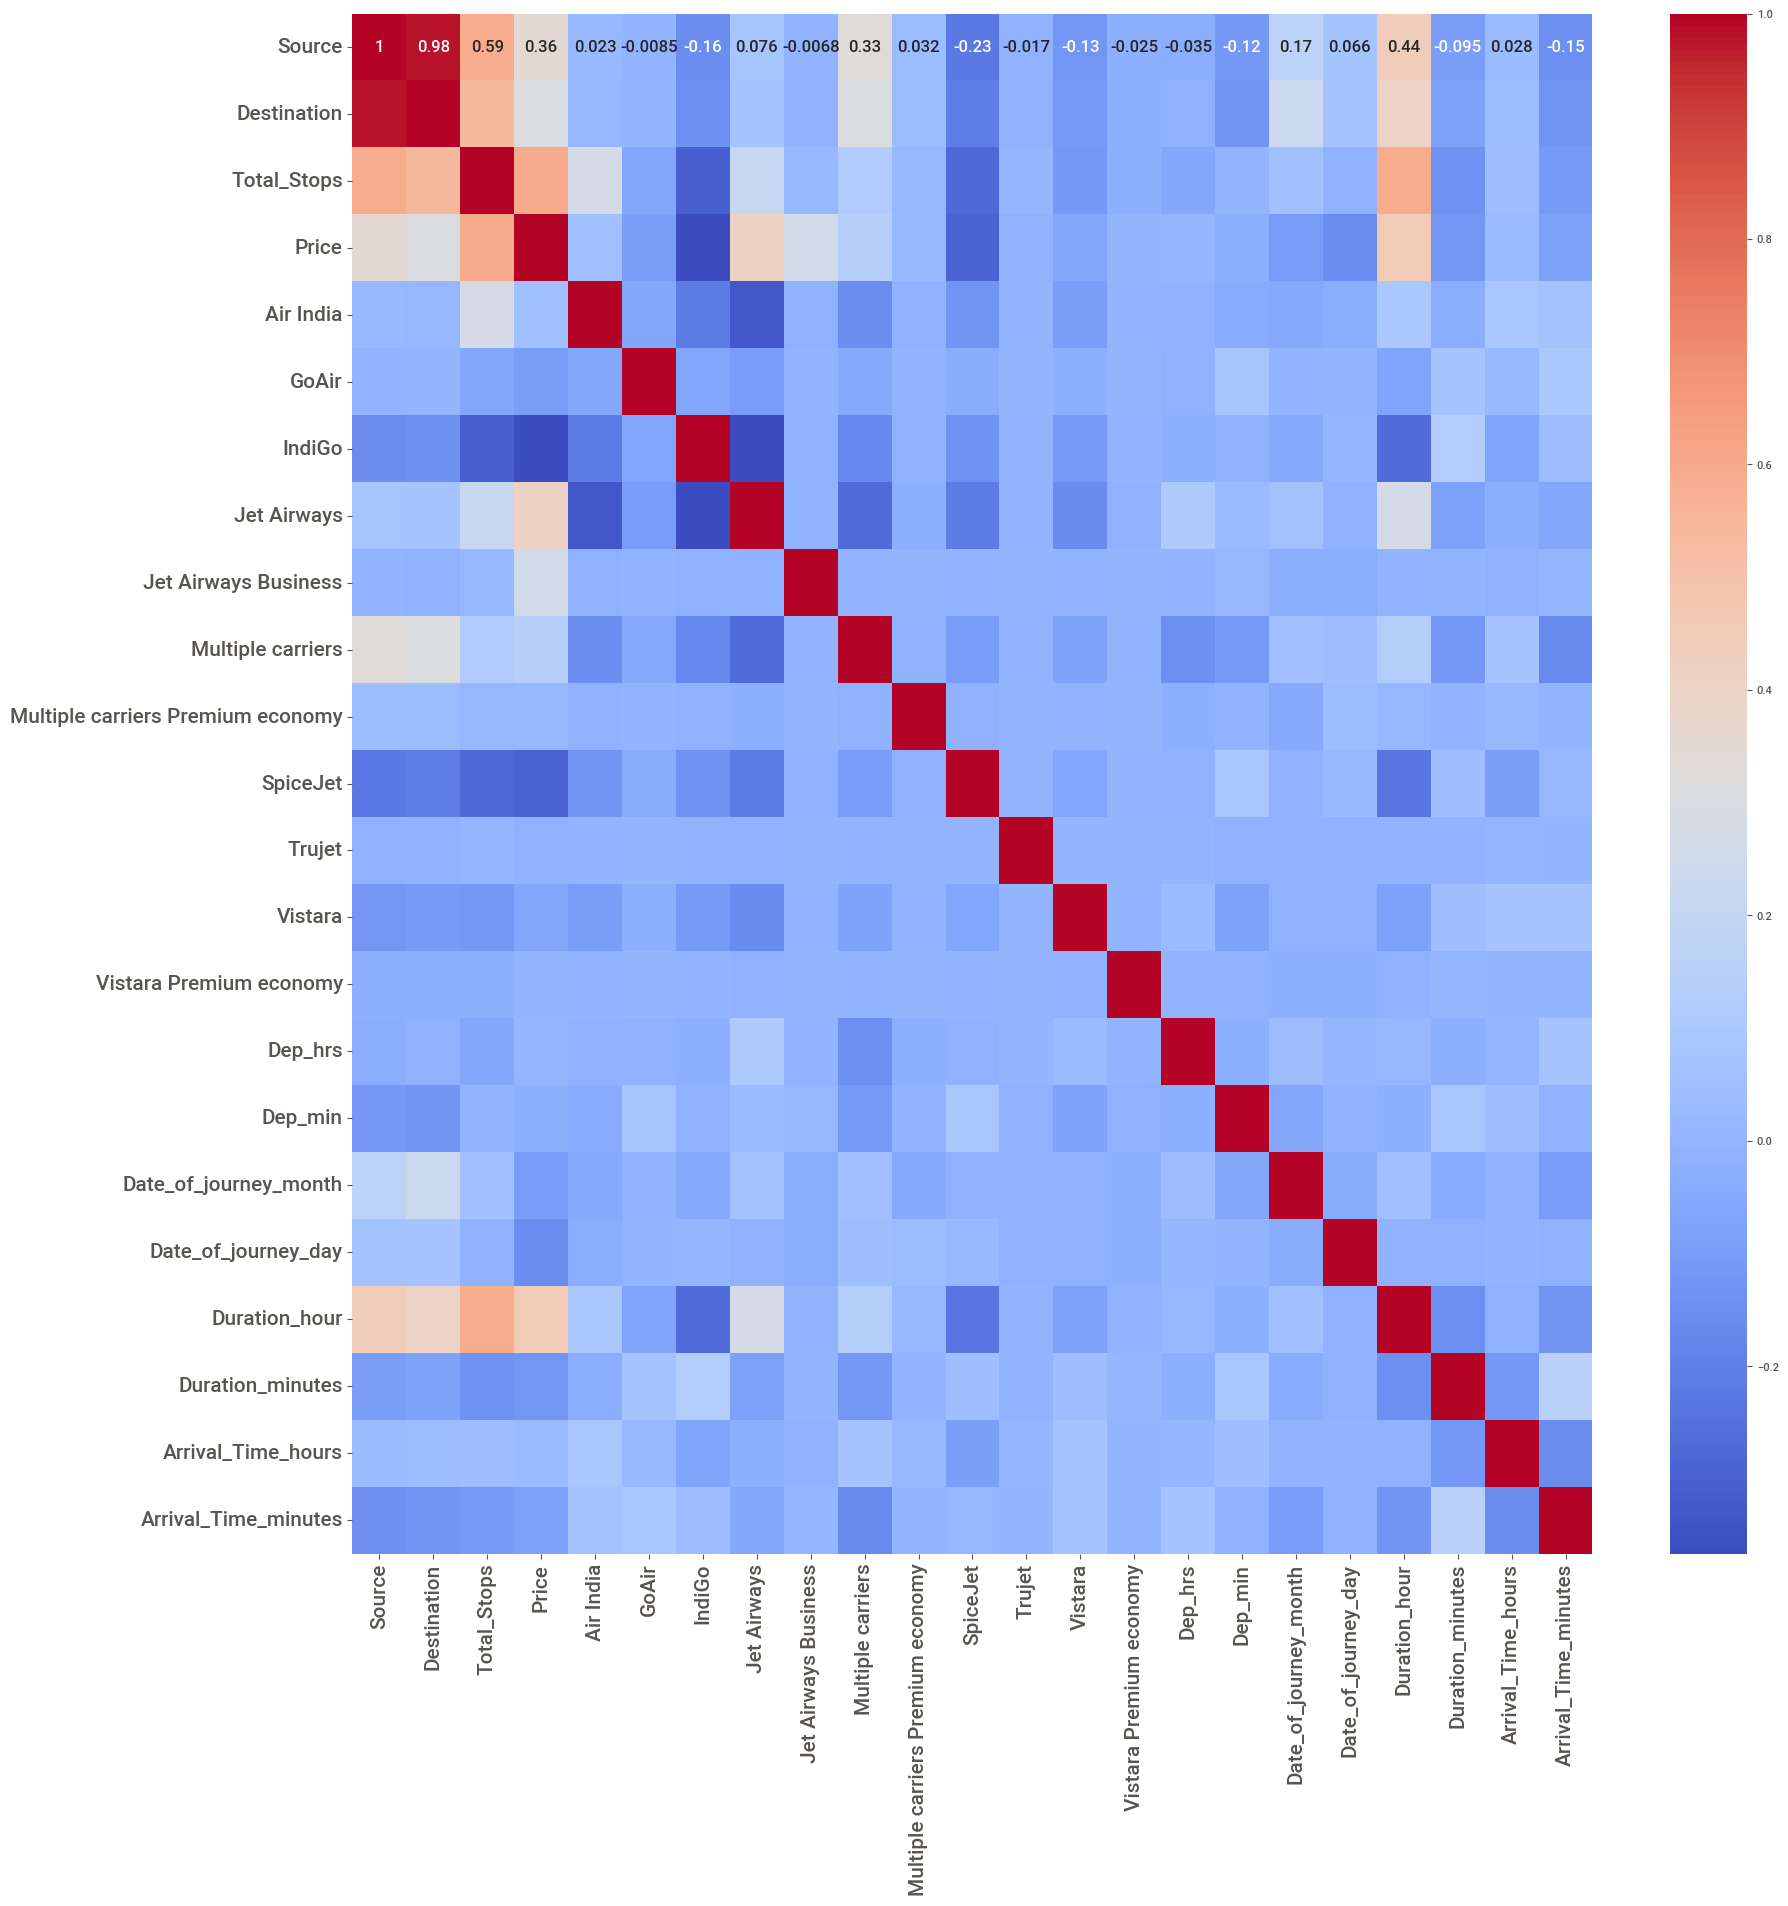

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.tick_params(labelsize=15)  # Corrected 'ticks' to 'tick_params'
plt.show()

In [59]:
data.drop("Destination",axis=1,inplace=True)

####  Insights:

- We notice some instances of high correlation, particularly between independent and dependent columns.
- Given the strong correlation between 'Destination' and 'Source', we have decided to remove one of these columns.

## 9. Model Creation:
### 9.1 Linear Regression:-
#### Split data into x & y:

In [60]:
x = data.drop("Price",axis=1)
y = pd.DataFrame(data.Price)

In [61]:
# Create training and testing data:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=43)

In [62]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8011, 21)
(2671, 21)
(8011, 1)
(2671, 1)


### Model Building:

In [63]:
# import linear regression model
from sklearn.linear_model import LinearRegression


# initialise model
model = LinearRegression()

# Train model with x_train and y_train
model.fit(x_train,y_train)

LinearRegression()

In [64]:
# make prediction of test model:
y_pred = model.predict(x_test)

### Evaluation of the Model:

### loss functions is used to understand the difference between actual and predicted values

### Different Error/Loss functions in regression algorithm are listed below:

- MSE (Mean Squared Error)
- MAE (Mean Absolute Error)
- RMSE (Root mean square Error)

Train : x_train , y_train

Prediction : x_test

Evaluate : y_test , y_pred

In [65]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [66]:
# MSE
MSE = mean_squared_error(y_test,y_pred)
MSE

8196598.412977735

In [67]:
# MAE 
MAE = mean_absolute_error(y_test,y_pred)
MAE

1981.6390045424193

In [68]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

2862.9702081889945

In [69]:
# R2-score
r2_score(y_test,y_pred)

0.6423571285208616

In [70]:
# size of test data 
y_test.shape

(2671, 1)

In [71]:
lr_score=r2_score(y_test,y_pred)
lr_score

0.6423571285208616

In [72]:
# adjusted r2 score
adj_r2=1-(1-lr_score)*(2671-1)/(2671-21-1)
adj_r2

0.6395219075691583

## 9.2. KNN:-
### Split data into X & Y:

In [73]:
x = data.drop("Price",axis=1)
y = data.Price

In [74]:
# Creating training and testing data:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=43)

In [75]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8011, 21)
(2671, 21)
(8011,)
(2671,)


### Model Building:

In [76]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [77]:
y_pred = KNN.predict(x_test)

In [78]:
(y_test!=y_pred).sum()

2639

In [79]:
len(y_test)

2671

In [80]:
(y_test!=y_pred).sum()/len(y_test)

0.9880194683639086

In [81]:
# optimal k is taken to check how many nearest neighbors to be created
# create a list to store the error values for each k value
ERROR_RATE=[]
for i in range(1,21):
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(x_train,y_train)
    y_pred = KNN.predict(x_test)
    error_rate = (y_test!=y_pred).sum()/len(y_test)
    ERROR_RATE.append(error_rate)

In [82]:
ERROR_RATE

[0.7895919131411456,
 0.9273680269561961,
 0.9700486709097716,
 0.982029202545863,
 0.9880194683639086,
 0.9910146012729315,
 0.9932609509546986,
 0.9958816922500936,
 0.9981280419318608,
 0.9992512167727443,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Text(0, 0.5, 'Error Rate')

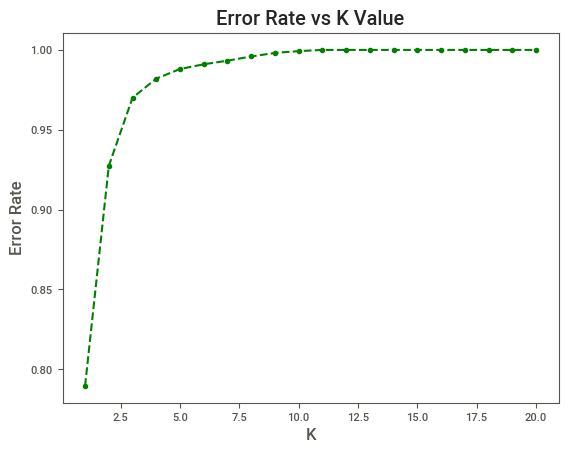

In [83]:
# graphical representation of error rate vs k value:
plt.plot(range(1,21),ERROR_RATE,color="green",marker='o',linestyle='--')
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [84]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=4)
KNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [85]:
y_pred = KNN.predict(x_test)

In [86]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [87]:
# MSE
MSE = mean_squared_error(y_test,y_pred)
MSE

9640047.377831336

In [88]:
# MAE 
MAE = mean_absolute_error(y_test,y_pred)
MAE

1951.1610819917635

In [89]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

3104.84256892863

In [90]:
# R2-score
r2_score(y_test,y_pred)

0.5793749978108262

In [91]:
# size of test data 
y_test.shape

(2671,)

In [92]:
knn_score =r2_score(y_test,y_pred)
knn_score

0.5793749978108262

In [93]:
# adjusted r2 score
adj_r2=1-(1-knn_score)*(2671-1)/(2671-21-1)
adj_r2

0.5760404847696889

# 9.3. Decision Tree:
## Split data into X & Y:

In [94]:
x = data.drop("Price",axis=1)
y = data.Price

In [95]:
# create Training & Testing Data:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [96]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8011, 21)
(2671, 21)
(8011,)
(2671,)


## Model Building:

In [97]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [98]:
y_pred = DT.predict(x_test)

In [99]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [100]:
# MSE
MSE = mean_squared_error(y_test,y_pred)
MSE

5080290.2511927495

In [101]:
# MAE 
MAE = mean_absolute_error(y_test,y_pred)
MAE

1322.4869274928242

In [102]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

2253.949922068534

In [103]:
# R2-score
r2_score(y_test,y_pred)

0.7535398175876672

In [104]:
DT_score =r2_score(y_test,y_pred)
DT_score

0.7535398175876672

In [105]:
# adjusted r2 score
adj_r2=1-(1-DT_score)*(2671-1)/(2671-21-1)
adj_r2

0.7515859996070484

# 9.4. Random Forest:
## Split data into X & Y:

In [106]:
x = data.drop("Price",axis=1)
y = data.Price

In [107]:
# creating Training & Testing:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [108]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8011, 21)
(2671, 21)
(8011,)
(2671,)


## Model Building:

In [109]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [110]:
y_pred = RFR.predict(x_test)

In [111]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [112]:
# MSE
MSE = mean_squared_error(y_test,y_pred)
MSE

3445831.718059117

In [113]:
# MAE 
MAE = mean_absolute_error(y_test,y_pred)
MAE

1164.0359075541746

In [114]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

1856.2951591972428

In [115]:
# R2-score
r2_score(y_test,y_pred)

0.8328323241776072

In [116]:
RFR_score =r2_score(y_test,y_pred)
RFR_score

0.8328323241776072

In [117]:
# adjusted r2 score
adj_r2=1-(1-RFR_score)*(2671-1)/(2671-21-1)
adj_r2

0.8315070991144625

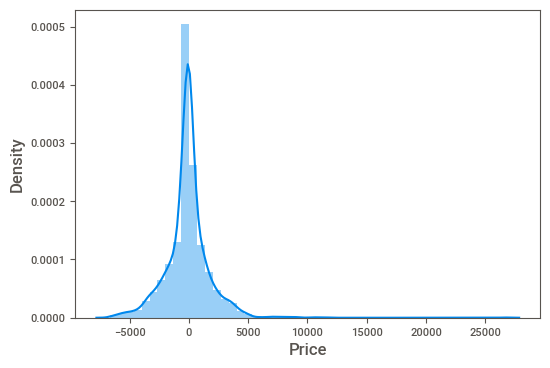

In [118]:
plt.figure(figsize=(6,4))
sns.distplot(y_test-y_pred)
plt.show()

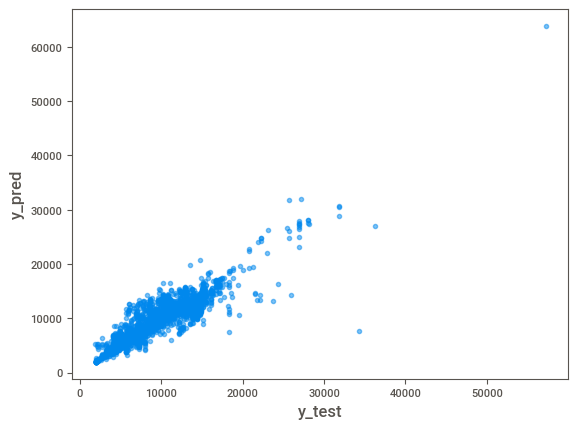

<Figure size 600x400 with 0 Axes>

In [119]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize=(6,4))
plt.show()

## Hyper Parameter Tunning:

In [124]:
from sklearn.model_selection import RandomizedSearchCV

In [125]:
n_estimators=[int(x)for x in np.linspace(start=100,stop=1000,num=10)]
max_features=['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 30, num=5)]
min_samples_split=[2,3,5,10,15]
min_samples_leaf=[2,3,5,10,15]

In [126]:
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf} 

In [127]:
rf_random=RandomizedSearchCV(estimator=RFR,
                             param_distributions=random_grid,
                             scoring='neg_mean_squared_error',
                             n_iter=200,
                             cv=4,
                             verbose=2,
                             random_state=78,
                             n_jobs=-1)
rf_random.fit(x_train,y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 5, 10, 15],
                                        'min_samples_split': [2, 3, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=78, scoring='neg_mean_squared_error',
                   verbose=2)

In [128]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 24}

In [129]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor(n_estimators= 900,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 12)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

In [130]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [131]:
# MSE
MSE = mean_squared_error(y_test,y_pred)
MSE

3445831.718059117

In [132]:
# MAE 
MAE = mean_absolute_error(y_test,y_pred)
MAE

1164.0359075541746

In [133]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

1856.2951591972428

In [134]:
# R2-score
r2_score(y_test,y_pred)

0.8328323241776072

In [135]:
rf_random_score =r2_score(y_test,y_pred)
rf_random_score

0.8328323241776072

In [136]:
# adjusted r2 score
adj_r2=1-(1-rf_random_score)*(2671-1)/(2671-21-1)
adj_r2

0.8315070991144625

In [137]:
Prediction = rf_random.predict(x_test)

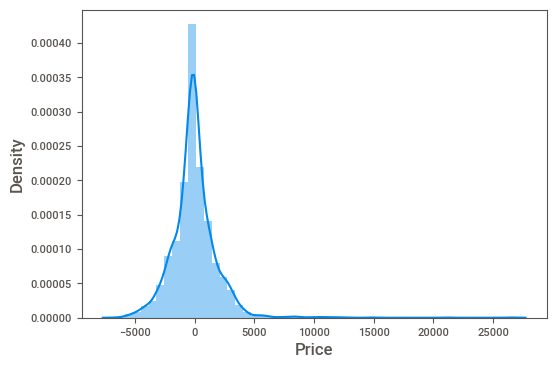

In [138]:
plt.figure(figsize=(6,4))
sns.distplot(y_test-Prediction)
plt.show()

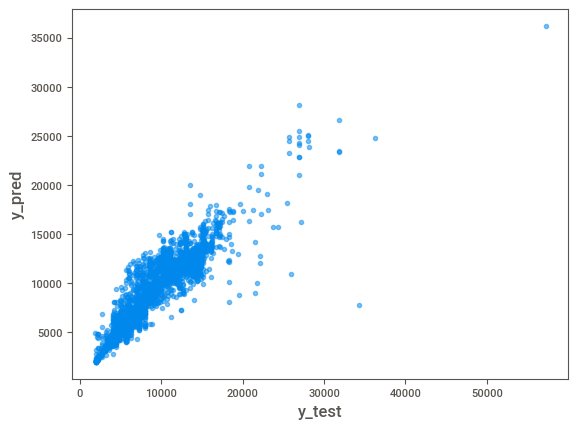

<Figure size 600x400 with 0 Axes>

In [139]:
plt.scatter(y_test, Prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize=(6,4))
plt.show()

## 9.5. Gradiant Boosting:
### Split data into X & Y:

In [140]:
x = data.drop("Price",axis=1)
y = data.Price

In [141]:
# create Training & Testing Data:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [142]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8011, 21)
(2671, 21)
(8011,)
(2671,)


### Model Building:

In [143]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(n_estimators=210)
GB.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=210)

In [144]:
y_hat = GB.predict(x_test)

In [145]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [146]:
# MSE
MSE = mean_squared_error(y_test,y_hat)
MSE

4185958.8622698537

In [147]:
# MAE 
MAE = mean_absolute_error(y_test,y_hat)
MAE

1444.17524108052

In [148]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

2045.9615984347931

In [149]:
# R2-score
r2_score(y_test,y_hat)

0.7969265270772012

In [150]:
GB_score=r2_score(y_test,y_hat)
GB_score

0.7969265270772012

In [151]:
# adjusted r2 score
adj_r2=1-(1-GB_score)*(2671-1)/(2671-21-1)
adj_r2

0.7953166580959333

### Hyper Parameter Tunning:

In [152]:
from sklearn.model_selection import RandomizedSearchCV

In [153]:
param_grid = {
    'n_estimators': [100, 200, 500, 1000 ],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 9, 11],
    'min_samples_split': [2, 4, 8, 10 ],
    'min_samples_leaf': [1, 2, 4, 8],
    'subsample': [0.8,0.9, 1.0, 2.0 ]
}

In [154]:
rsc=RandomizedSearchCV(estimator=GB,
                       param_distributions=param_grid,
                       scoring='neg_mean_squared_error',
                       n_iter=100,
                       cv=4,
                       verbose=2,
                       random_state=43,
                       n_jobs=-1)

In [155]:
rsc.fit(x_train,y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(n_estimators=210),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'max_depth': [3, 5, 9, 11],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 4, 8, 10],
                                        'n_estimators': [100, 200, 500, 1000],
                                        'subsample': [0.8, 0.9, 1.0, 2.0]},
                   random_state=43, scoring='neg_mean_squared_error',
                   verbose=2)

In [156]:
rsc.best_params_

{'subsample': 0.8,
 'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 9,
 'learning_rate': 0.01}

In [157]:
gradiant_boosting=GradientBoostingRegressor(
 subsample= 0.8,
 n_estimators= 500,
 min_samples_split= 10,
 min_samples_leaf= 4,
 max_depth= 9,
 learning_rate= 0.01)
gradiant_boosting.fit(x_train,y_train)
y_pred=gradiant_boosting.predict(x_test)

In [158]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [159]:
# MSE
MSE = mean_squared_error(y_test,y_pred)
MSE

2923073.893863753

In [160]:
# MAE 
MAE = mean_absolute_error(y_test,y_pred)
MAE

1129.9567833394499

In [161]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

1709.699942640156

In [162]:
# R2-score
r2_score(y_test,y_pred)

0.858192880826593

In [163]:
GBST_score=r2_score(y_test,y_pred)
GBST_score

0.858192880826593

In [164]:
# adjusted r2 score
adj_r2=1-(1-GBST_score)*(2671-1)/(2671-21-1)
adj_r2

0.857068702078899

## 10.RESULT:

Comparing all the Best Models Evaluated by Cross Validation

LinearRegressor - CV: 0.63

KNeighborsRegressor - CV: 0.57

DecisionTreeRegressor - CV: 0.75

RandomForestRegressor - CV: 0.83

GradientBoostingRegressor - CV: 0.85



In [165]:
scores = [lr_score,knn_score,DT_score,rf_random_score,GBST_score]
algorithms = ["Linear Regression","KNN","Decision Tree","Random Forest","Gradient Boosting"]    

for i in range(len(algorithms)):
    print("The R2 score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The R2 score achieved using Linear Regression is: 0.6423571285208616 %
The R2 score achieved using KNN is: 0.5793749978108262 %
The R2 score achieved using Decision Tree is: 0.7535398175876672 %
The R2 score achieved using Random Forest is: 0.8328323241776072 %
The R2 score achieved using Gradient Boosting is: 0.858192880826593 %


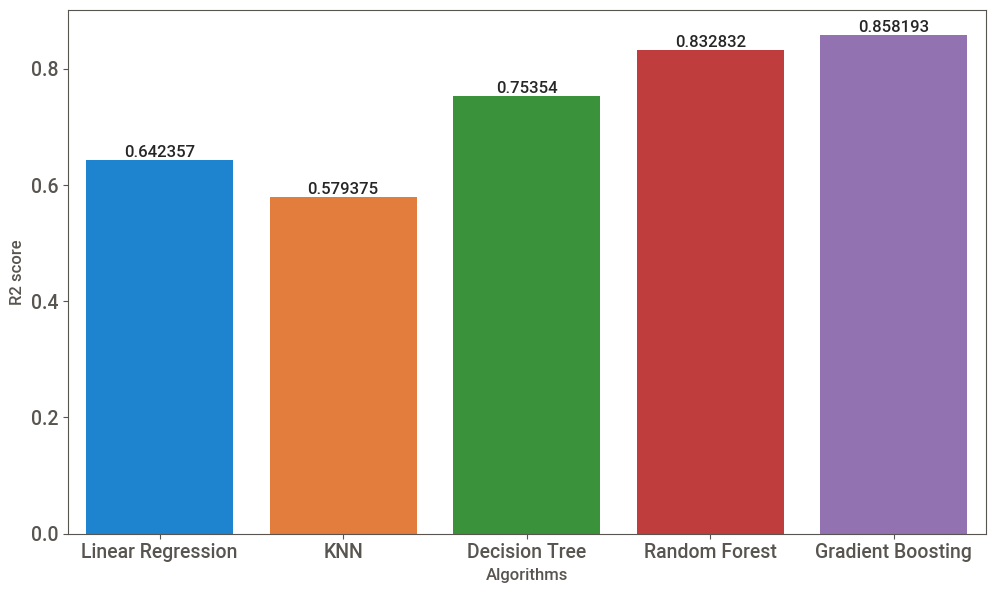

In [166]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("R2 score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()
plt.tick_params(labelsize=14)

### Conclusion

"In conclusion, applying machine learning to predict flight fares has shown to be beneficial for both travelers and airlines. The analysis has brought to light some key findings:

**Model Performance**: The Gradient Boosting model emerged as the best performer, achieving an R-squared (r2_score) of 0.85. This high accuracy level demonstrates the model's capability to predict flight fares accurately, shedding light on pricing patterns.

**Alternative Model**: The Random Forest model, while slightly less precise with an R-squared of 0.84, still offers robust predictive performance. This suggests that there are different machine learning models suitable for predicting flight fares, allowing flexibility in choosing the best approach.

**Influential Features**: Important factors like Total_Stops, Duration, Airline, and Route have been identified as having a significant impact on flight fares. Knowing these factors can help travelers make informed choices and assist airlines in refining their pricing strategies.

To summarize, machine learning-based flight fare prediction is a powerful method for optimizing pricing in the airline industry. As machine learning methods continue to improve and more comprehensive data becomes available, the accuracy and usefulness of these models are expected to grow, enhancing their role in guiding airline pricing strategies and offering valuable insights for travelers."

### Challenges Faced

Challenges Faced in Flight Fare Prediction using Machine Learning:

**Converting Date and Time**:
Working with date and time data can be tricky due to the diverse formats in which this information is stored. To make these data usable for machine learning, you must convert them into a standardized, machine-readable format. In flight fare prediction, this means extracting specific information like the day of the week, the month, or the time of day from date and time columns, which requires careful parsing and feature engineering to create relevant inputs for the model.

**Feature Correlation**:
When you have a lot of features, finding those with the most significant impact on your target variable (in this case, flight fare) can be challenging. Analyzing correlations among these features is crucial to identify which ones are strongly related to the target variable. Tools like correlation matrices, scatter plots, and statistical tests help uncover these relationships, but with a large number of features, the process can be complicated and time-consuming.

**Hyperparameter Tuning**:
Optimizing a model often involves adjusting its hyperparameters, a task that requires repeated trials with different configurations to achieve the best performance. Because hyperparameter tuning involves navigating through a large set of possible values, and each test requires retraining the model, it can be resource-intensive and slow. Strategies like grid search and random search are commonly used to streamline this process and find optimal hyperparameters efficiently.